In [4]:
import pandas as pd
df=pd.read_csv('database.csv')
df.head()

C:\Users\Irina\AppData\Local\Temp\ipykernel_7116\587663963.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Name,Hiring Date,Department,Birthday
0,Melanie Clark,2023-11-24,Sales,1964-07-15
1,Nicholas Frost MD,2019-12-18,Marketing,1980-02-24
2,Terri Allen,2020-02-05,HR,1995-08-05
3,Katrina Jones,2023-05-29,Engineering,2000-09-02
4,Marcus Smith,2022-04-02,Engineering,1990-09-29


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         100 non-null    object
 1   Hiring Date  100 non-null    object
 2   Department   100 non-null    object
 3   Birthday     100 non-null    object
dtypes: object(4)
memory usage: 3.3+ KB


In [6]:
df['Hiring Date'] = pd.to_datetime(df['Hiring Date'])
df['Birthday'] = pd.to_datetime(df['Birthday'])

In [7]:
df.dtypes


Name                   object
Hiring Date    datetime64[ns]
Department             object
Birthday       datetime64[ns]
dtype: object

In [42]:
df['Birth Month'] = df['Birthday'].dt.month

In [43]:
df.head()

,Name,Hiring Date,Department,Birthday,Birth Month,Mon_name
0,Melanie Clark,2023-11-24,Sales,1964-07-15,7,Jul
1,Nicholas Frost MD,2019-12-18,Marketing,1980-02-24,2,Feb
2,Terri Allen,2020-02-05,HR,1995-08-05,8,Aug
3,Katrina Jones,2023-05-29,Engineering,2000-09-02,9,Sep
4,Marcus Smith,2022-04-02,Engineering,1990-09-29,9,Sep


In [13]:
import calendar
df['Mon_name'] = df['Birth Month'].apply(lambda x: calendar.month_abbr[x])

In [44]:
birth_by_mon=df.groupby('Birth Month')['Department'].value_counts().reset_index(name='Count')

In [45]:
birth_by_mon.head()


,Birth Month,Department,Count
0,1,HR,3
1,1,Sales,3
2,1,Engineering,2
3,1,Marketing,1
4,2,Marketing,7


In [46]:
birth_by_mon.dtypes

Birth Month     int32
Department     object
Count           int64
dtype: object

In [32]:
birth_by_mon['Count']=pd.to_numeric(birth_by_mon['Count'])

In [28]:
birth_by_mon['Birth Month'] = birth_by_mon['Birth Month'].apply(lambda x: calendar.month_abbr[x])

In [47]:
pivoted=birth_by_mon.pivot(index='Birth Month', columns='Department', values='Count')
pivoted

Department,Engineering,HR,Marketing,Sales
Birth Month,,,,
1,2.0,3.0,1.0,3.0
2,2.0,3.0,7.0,1.0
3,NaN,3.0,NaN,3.0
4,2.0,NaN,3.0,6.0
5,2.0,NaN,4.0,4.0
6,1.0,1.0,NaN,2.0
7,2.0,6.0,4.0,2.0
8,1.0,5.0,1.0,1.0
9,2.0,2.0,NaN,NaN


In [48]:
pivoted= pivoted.fillna(0)  # Replace NaN values with 0
pivoted = pivoted.astype(int)


In [51]:
pivoted

Department,Engineering,HR,Marketing,Sales
Birth Month,,,,
Jan,2,3,1,3
Feb,2,3,7,1
Mar,0,3,0,3
Apr,2,0,3,6
May,2,0,4,4
Jun,1,1,0,2
Jul,2,6,4,2
Aug,1,5,1,1
Sep,2,2,0,0


In [50]:
month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
pivoted.index = pivoted.index.map(month_names)

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt



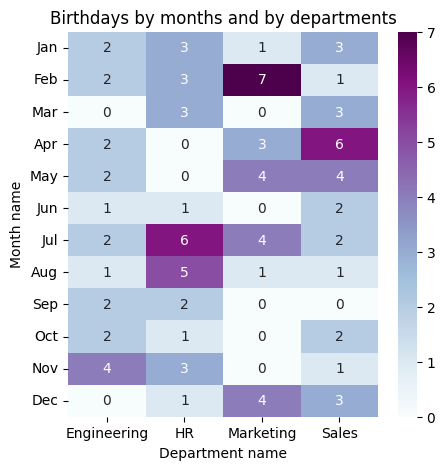

In [65]:
# Create a heatmap
plt.figure(figsize=(5, 5))  # Adjust the figure size as per your requirements
sns.heatmap(pivoted, annot=True, cmap='BuPu', fmt='d')  # 'data' is your DataFrame

# Set labels and title
plt.xlabel('Department name')
plt.ylabel('Month name')
plt.yticks(rotation=0)
plt.title('Birthdays by months and by departments')

# Show the plot
plt.show()